## Questão 3

### Preparação dos dados

In [247]:
import numpy as np
from random import uniform
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [248]:
from shapely.geometry import Polygon, Point

### Setores delimitados pelo losango

In [249]:
## ref: https://gis.stackexchange.com/questions/6412/generate-points-that-lie-inside-polygon
def get_random_point_in_polygon(poly):
    minx, miny, maxx, maxy = poly.bounds
    
    while True:
        p = Point(uniform(minx, maxx), uniform(miny, maxy))
        if poly.contains(p):
            return p
points = 500

c1 = Polygon([(0, 0), (1, 0), (0, 1), (0, 0)])
c1Points = []

c2 = Polygon([(0, 0), (-1, 0), (0, 1), (0, 0)])
c2Points = []

c3 = Polygon([(0, 0), (-1, 0), (0, -1), (0, 0)])
c3Points = []

c4 = Polygon([(0, 0), (1, 0), (0, -1), (0, 0)])
c4Points = []

for i in range(points):
    c1Points.append(get_random_point_in_polygon(c1))
    c2Points.append(get_random_point_in_polygon(c2))
    c3Points.append(get_random_point_in_polygon(c3))
    c4Points.append(get_random_point_in_polygon(c4))

### Setores delimitados pelo círculo

In [250]:
# função para criar setores de um círculo disponí vel em:
# https://stackoverflow.com/questions/54284984/sectors-representing-and-intersections-in-shapely

import math

def sector(center, start_angle, end_angle, radius, steps=200):
    def polar_point(origin_point, angle,  distance):
        return [origin_point.x + math.sin(math.radians(angle)) * distance, origin_point.y + math.cos(math.radians(angle)) * distance]

#     if start_angle > end_angle:
#         start_angle = start_angle - 360
#     else:
#         pass
    step_angle_width = (end_angle-start_angle) / steps
    sector_width = (end_angle-start_angle) 
    segment_vertices = []

    segment_vertices.append(polar_point(center, 0,0))
    segment_vertices.append(polar_point(center, start_angle,radius))

    for z in range(1, steps):
        segment_vertices.append((polar_point(center, start_angle + z * step_angle_width,radius)))
    segment_vertices.append(polar_point(center, start_angle+sector_width,radius))
    segment_vertices.append(polar_point(center, 0,0))
    return Polygon(segment_vertices)

In [251]:
center = Point(0,0)
sect1 = sector(center, 0, 90, 1)
sect2 = sector(center, 0, -90, 1) ## 0, -90
sect3 = sector(center, 180, 270, 1)
sect4 = sector(center, 180, 90, 1) ## 180, 90

c5 = sect1.difference(c1)
c5Points = []
c6 = sect2.difference(c2)
c6Points = []
c7 = sect3.difference(c3)
c7Points = []
c8 = sect4.difference(c4)
c8Points = []

for i in range(points):
    c5Points.append(get_random_point_in_polygon(c5))
    c6Points.append(get_random_point_in_polygon(c6))
    c7Points.append(get_random_point_in_polygon(c7))
    c8Points.append(get_random_point_in_polygon(c8))

### Graficamente, temos:

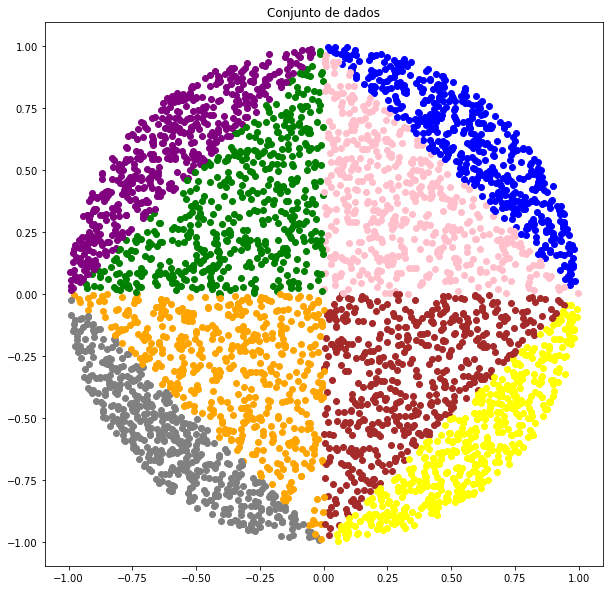

In [252]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.title('Conjunto de dados')
for i in range(points):
    #losango
    plt.scatter(c1Points[i].x, c1Points[i].y, color='pink')
    plt.scatter(c2Points[i].x, c2Points[i].y, color='green')
    plt.scatter(c3Points[i].x, c3Points[i].y, color='orange')
    plt.scatter(c4Points[i].x, c4Points[i].y, color='brown')
    #círculo
    plt.scatter(c5Points[i].x, c5Points[i].y, color='blue')
    plt.scatter(c6Points[i].x, c6Points[i].y, color='purple')
    plt.scatter(c7Points[i].x, c7Points[i].y, color='grey')
    plt.scatter(c8Points[i].x, c8Points[i].y, color='yellow')
plt.show()

## Separar conjunto de teste do de treinamento

In [253]:
from sklearn.model_selection import train_test_split

samples = []
labels = []

for i in range(points):
    samples.append([c1Points[i].x, c1Points[i].y])
    labels.append([1,0,0,0,0,0,0,0])
    samples.append([c2Points[i].x, c2Points[i].y])
    labels.append([0,1,0,0,0,0,0,0])
    samples.append([c3Points[i].x, c3Points[i].y])
    labels.append([0,0,1,0,0,0,0,0])
    samples.append([c4Points[i].x, c4Points[i].y])
    labels.append([0,0,0,1,0,0,0,0])
    samples.append([c5Points[i].x, c5Points[i].y])
    labels.append([0,0,0,0,1,0,0,0])
    samples.append([c6Points[i].x, c6Points[i].y])
    labels.append([0,0,0,0,0,1,0,0])
    samples.append([c7Points[i].x, c7Points[i].y])
    labels.append([0,0,0,0,0,0,1,0])
    samples.append([c8Points[i].x, c8Points[i].y])
    labels.append([0,0,0,0,0,0,0,1])

samples = np.array(samples)
labels = np.array(labels)

train_samples, test_samples, train_labels, test_labels = train_test_split(samples, labels, test_size=0.2, random_state=45)

#train_samples = train_samples.reshape(-1,2)
#train_labels = train_labels.reshape(-1,1)
print(train_samples.shape)
print(train_labels.shape)

(3200, 2)
(3200, 8)


## Modelo

In [254]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [255]:
model = Sequential([
    Dense(units=16, input_shape=(2,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=8, activation='softmax'),
])

In [256]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_47 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 264       
Total params: 856
Trainable params: 856
Non-trainable params: 0
_________________________________________________________________


In [257]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

## Treinamento

In [258]:
result = model.fit(x=train_samples, y=train_labels, validation_split=0.1, batch_size=22, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
131/131 - 0s - loss: 0.8545 - accuracy: 0.6490 - val_loss: 0.4069 - val_accuracy: 0.8562
Epoch 2/50
131/131 - 0s - loss: 0.3230 - accuracy: 0.8854 - val_loss: 0.2304 - val_accuracy: 0.9125
Epoch 3/50
131/131 - 0s - loss: 0.2312 - accuracy: 0.9108 - val_loss: 0.1870 - val_accuracy: 0.9187
Epoch 4/50
131/131 - 0s - loss: 0.2042 - accuracy: 0.9201 - val_loss: 0.1480 - val_accuracy: 0.9406
Epoch 5/50
131/131 - 0s - loss: 0.1873 - accuracy: 0.9187 - val_loss: 0.1481 - val_accuracy: 0.9469
Epoch 6/50
131/131 - 0s - loss: 0.1757 - accuracy: 0.9278 - val_loss: 0.1205 - val_accuracy: 0.9563
Epoch 7/50
131/131 - 0s - loss: 0.1523 - accuracy: 0.9333 - val_loss: 0.1245 - val_accuracy: 0.9656
Epoch 8/50
131/131 - 0s - loss: 0.1424 - accuracy: 0.9413 - val_loss: 0.1141 - val_accuracy: 0.9469
Epoch 9/50
131/131 - 0s - loss: 0.1499 - accuracy: 0.9306 - val_loss: 0.1121 - val_accuracy: 0.9656
Epoch 10/50
131/131 - 0s - loss: 0.1402 - accuracy: 0.9413 - val_loss: 0.1370 - val_accuracy: 0.9344

### Gráfico do erro ao longo das épocas

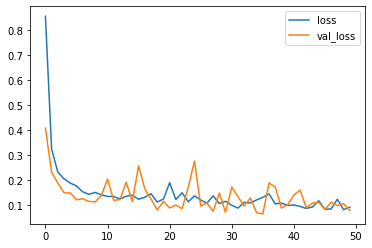

In [259]:
from matplotlib import pyplot as plt

plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

## Teste

In [260]:
predictions = model.predict(x=test_samples, batch_size=22,verbose=0)

In [262]:
rounded_predictions = np.argmax(predictions, axis=-1)

## Desempenho

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
accuracy_score(rounded_predictions, np.argmax(test_labels, axis=-1))

0.9725

## Matriz de Confusão

In [266]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [268]:
cm = confusion_matrix(y_true=np.argmax(test_labels, axis=-1), y_pred=rounded_predictions)

In [269]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 93   0   0   0   0   0   0   0]
 [  1  96   0   0   0   1   0   0]
 [  0   0 109   0   0   0   9   0]
 [  1   0   3  85   0   0   0   2]
 [  0   0   0   0  94   0   0   0]
 [  0   5   0   0   0 119   0   0]
 [  0   0   0   0   0   0 105   0]
 [  0   0   0   0   0   0   0  77]]


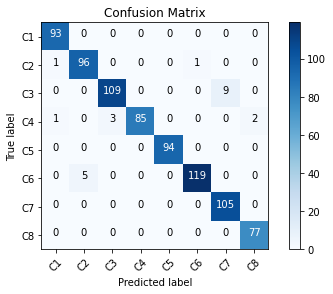

In [270]:
cm_plot_labels = ['C1','C2','C3','C4','C5','C6','C7','C8']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')